## Final Project Submission

Please fill out:
* Student name: Gabriel Blatstein
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: Brandon Lewis
* Blog post URL: https://gabertooth.github.io/my_first_linear_regression_analysis


In [1]:
import warnings
warnings.filterwarnings('ignore')

The following jupyter notebook walks you through a data set of houses in King County, Washington. The following variables are contained within the data set:
1. id: unique identified for a house
2. Date: house was sold
3. Price: ***Our prediction target variable***
4. Bedrooms: Number of bedrooms in a home
5. Bathrooms: Number of bathrooms in a home
6. Sqft_livingsquare: Sqaure footage of the home
7. Sqft_lotsquare:  Squre footage of the lot the home is built on
8. Floors:  Number of floors (or levels) in the home
9. Waterfront: House which has a view to a waterfront
10. View: Number of times the home has been viewed
11. Condition: The overall condition of the home
12. Grade: Overall grade given to the housing unit, based on King County grading system
13. Sqft_above: Square footage of house without including the basement
14. Sqft_basement: Square footage of the basement
15. Yr_built: Year the house was built in
16. Yr_renovated: Year when house was renovated
17. Zipcode: Zip of the home
18. Lat: Latitude coordinate
19. Long: Longitude coordinate
20. Sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors
21. Sqft_lot15: The square footage of the land lots of the nearest 15 neighbors


***We will be using the OSEMN Process:***

1. Obtain: Obtain the data from the relevant resources and stakeholders

2. Scrub: Cleaning the data into formats that can be digested in Python packackages such as Sklearn or Statsmodels Rememer the "Gargbage in, garbage out".

3. Explore: Using statistical methods and data analytic techniques explore the data to find significant patterns or trends

4. Model: Construct models to predict and forecast the data. Here we focus on our target variable which is price!

5. Interpret: Take the results of the analysis and model and create meaningful visualizations or presentations

    
    

# Data Obtaining

In [2]:
#Importing all necessary libriaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Modeling and Vaidation Libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm 
import statsmodels.formula.api as smf

First we will start by loading our data and having a quick look at some summary inforrmation

In [3]:
df=pd.read_csv('kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


I noticed a NaN value in waterfront and wanted to take a look at a few of the variables unique values. 

In [5]:
print('Water Front:' , df['waterfront'].unique())
print('View:' , df['view'].unique())
print('Bathrooms:' , df['bathrooms'].unique())
print('Bedrooms:' , df['bedrooms'].unique())
print('Condition' , df['condition'].unique())

Water Front: [nan  0.  1.]
View: [ 0. nan  3.  4.  2.  1.]
Bathrooms: [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75 6.25
 6.5 ]
Bedrooms: [ 3  2  4  5  1  6  7  8  9 11 10 33]
Condition [3 5 4 1 2]


In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Intial Observations:

1. Sqft Basement and Date both need changes to be made to their data types. We will want to make date into a date time data type and Sqft basement into a numerical friendly type like float64

2. In addition we can start to identify some of the categorical variables. For example it looks like waterfront is coded with a 1 or a 0 for whether or not their is a waterfront view.




### Data Cleaning

First, we will check to see if there are any NaN or other weird data integrity issues going on.

In [8]:
df.isna().sum() #We see here that we will have to take a look at the following variables due to have Null or NaN values.

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We see that there are three variables that have NaN values and need to be delt with. 

In [9]:
sum((df.yr_renovated==0))

17011

There are 17011 instances of yr_renovated being 0 therefore we will fill this variables NaN's with zeroes

As for view we will assume that setting view equal to 0 for the 63 instances will not weigh significantly on our data later on during modeling. 

As for waterfront, a 0 represents no view of waterfront and 1 represents a view of a waterfront. Therefore we will make the 2,376 records with NaN into zeroes also.

We will replace the three NaN affected variables with zeroes now. 

In [10]:
for i in df:
    df.replace(np.NaN, 0 , inplace=True)

I decided to replace all of the NaN values with the string 'NaN'

In [11]:
df.isna().sum() #cleaned all data, there are no more NaN's

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Categorical Var Cleaning

Here is the start of breaking up our categorical variables and our numerical or quantitative variables. First we will have to decide which cat vars we will use one hot coding or if we will manually bin them. 

In [12]:
df_cat=df[['waterfront','condition','view','floors','zipcode','date','grade','yr_built','yr_renovated','bedrooms','bathrooms']]

df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
waterfront      21597 non-null float64
condition       21597 non-null int64
view            21597 non-null float64
floors          21597 non-null float64
zipcode         21597 non-null int64
date            21597 non-null object
grade           21597 non-null int64
yr_built        21597 non-null int64
yr_renovated    21597 non-null float64
bedrooms        21597 non-null int64
bathrooms       21597 non-null float64
dtypes: float64(5), int64(5), object(1)
memory usage: 1.8+ MB


In [13]:
#Cleaning variables to ensure categorical variables are not taken up as being numerical.
df_cat.loc[:,['waterfront']]= df['waterfront'].astype('category')
df_cat.loc[:,['condition']]= df['condition'].astype("category")
df_cat.loc[:,['view']]= df['view'].astype("category")
df_cat.loc[:,['floors']]= df['floors'].astype("category")
df_cat.loc[:,['zipcode']]= df['zipcode'].astype("category")
df_cat.loc[:,['grade']] = df['grade'].astype('category')
df_cat.loc[:,['yr_built']] = df['yr_built'].astype('category')
df_cat.loc[:,['bedrooms']]= df['bedrooms'].astype('category')
df_cat.loc[:,['bathrooms']]= df['bathrooms'].astype('category')
df_cat.loc[:,['yr_renovated']]=df['yr_renovated'].astype('category')

In [14]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
waterfront      21597 non-null category
condition       21597 non-null category
view            21597 non-null category
floors          21597 non-null category
zipcode         21597 non-null category
date            21597 non-null object
grade           21597 non-null category
yr_built        21597 non-null category
yr_renovated    21597 non-null category
bedrooms        21597 non-null category
bathrooms       21597 non-null category
dtypes: category(10), object(1)
memory usage: 394.7+ KB


One hot coding will not work for any variables with data that has many unique values because then we would have way too many rows

Therefore, we will code a few of our variables using binning techiniques.

In [15]:
df['yr_built'].describe()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [16]:
bins = [1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2015] 
year = ['1900-1910','1910-1920','1920-1930','1930-1940','1940-1950','1950-1960','1960-1970','1970-1980','1980-1990','1990-2000','2000-2015']
df_cat['yr_built_new']=pd.cut(df_cat['yr_built'], bins= bins, labels=year)

In [17]:
df_cat.head()
#Check to make sure our new binned variable worked. 

,waterfront,condition,view,floors,zipcode,date,grade,yr_built,yr_renovated,bedrooms,bathrooms,yr_built_new
0,0.0,3,0.0,1.0,98178,10/13/2014,7,1955,0.0,3,1.00,1950-1960
1,0.0,3,0.0,2.0,98125,12/9/2014,7,1951,1991.0,3,2.25,1950-1960
2,0.0,3,0.0,1.0,98028,2/25/2015,6,1933,0.0,2,1.00,1930-1940
3,0.0,5,0.0,1.0,98136,12/9/2014,7,1965,0.0,4,3.00,1960-1970
4,0.0,3,0.0,1.0,98074,2/18/2015,8,1987,0.0,3,2.00,1980-1990


We will do the same for year renovated! But instead of binning by year we will bin by whether or not the house was ever renovated. 

In [18]:
df_cat=df_cat.drop('yr_built',axis=1)

In [19]:
bins1 = [-1,0,df.yr_renovated.max()] 
year1 = ['0','1']
df_cat['yr_renovated']=pd.cut(df_cat['yr_renovated'], bins= bins1, labels=year1)

In [20]:
df_cat.head()

,waterfront,condition,view,floors,zipcode,date,grade,yr_renovated,bedrooms,bathrooms,yr_built_new
0,0.0,3,0.0,1.0,98178,10/13/2014,7,0,3,1.00,1950-1960
1,0.0,3,0.0,2.0,98125,12/9/2014,7,1,3,2.25,1950-1960
2,0.0,3,0.0,1.0,98028,2/25/2015,6,0,2,1.00,1930-1940
3,0.0,5,0.0,1.0,98136,12/9/2014,7,0,4,3.00,1960-1970
4,0.0,3,0.0,1.0,98074,2/18/2015,8,0,3,2.00,1980-1990


In [21]:
dummies=df_cat[['waterfront','condition','view','floors','grade','bedrooms','zipcode','bathrooms','yr_built_new','yr_renovated']]
dummy_cat=pd.get_dummies(dummies,dtype='int64')

In [22]:
dummy_cat.head()

,waterfront_0.0,waterfront_1.0,condition_1,condition_2,condition_3,condition_4,condition_5,view_0.0,view_1.0,view_2.0,...,yr_built_new_1930-1940,yr_built_new_1940-1950,yr_built_new_1950-1960,yr_built_new_1960-1970,yr_built_new_1970-1980,yr_built_new_1980-1990,yr_built_new_1990-2000,yr_built_new_2000-2015,yr_renovated_0,yr_renovated_1
0,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


The last thing that needs to be done is the dat needs to be changed to a date time object.  This can easily be done with the following method, pd.to_datetime()

In [23]:
df_date=pd.to_datetime(df_cat.date)

In [24]:
#Joining the date with the other categorical variables
concat=[dummy_cat,df_date]
df_cat_final= pd.concat(concat, axis=1)
df_cat_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Columns: 154 entries, waterfront_0.0 to date
dtypes: datetime64[ns](1), int64(153)
memory usage: 25.4 MB


### Numerical Data Cleaning

In [25]:
df_num= df[['price','sqft_living','sqft_lot','sqft_basement','sqft_lot15']]

We noticed earlier that we had a question mark in our sqft_basement so we are going to handle that situation now by replacing it with a zero.

In [26]:
df_num['sqft_basement'].replace(to_replace='?', value= 0, inplace=True)
# df[df['sqft_basement']=='?']= '0'
df_num.loc[:,['sqft_basement']]=df_num['sqft_basement'].astype('float64')


In [27]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 5 columns):
price            21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
sqft_basement    21597 non-null float64
sqft_lot15       21597 non-null int64
dtypes: float64(2), int64(3)
memory usage: 843.7 KB


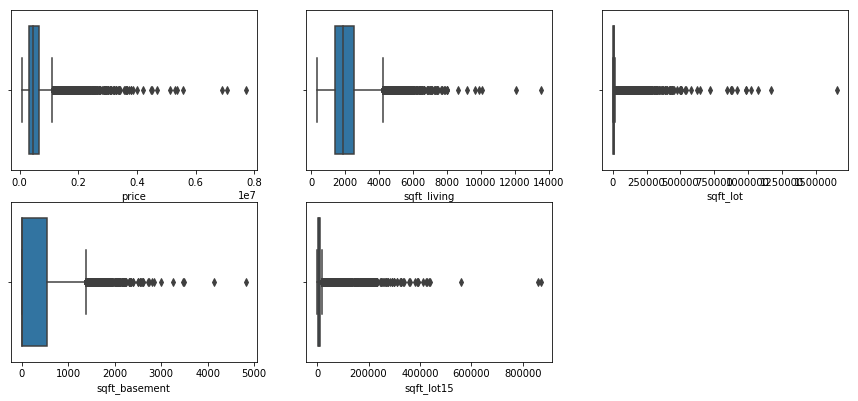

In [28]:
#Now we want to look for outliers in our numerical data

plt.figure(figsize=(15,10))
plt.subplot(331)
sns.boxplot(df_num['price'])
plt.subplot(332)
sns.boxplot(df_num['sqft_living'])
plt.subplot(333)
sns.boxplot(df_num['sqft_lot'])
plt.subplot(334)
sns.boxplot(df_num['sqft_basement'])
plt.subplot(335)
sns.boxplot(df_num['sqft_lot15'])




Here we are going to take out outliers we saw in our data and from analysis done prior.

In [29]:
df_num_final=df_num.loc[df_num['price']<=1500000,:]
df_num_final=df_num.loc[df_num['sqft_living']<= 5000,:]
df_num_final=df_num.loc[df_num['sqft_lot']<= 150000,:]
df_num_final=df_num.loc[df_num['sqft_lot15']<= 150000,:]
df_num_final=df_num.loc[df_num['sqft_basement']<= 1800,:]


In [30]:
#Double Check variables got changed
df_num.info()
#We see that we now only have 20334 data points for each variable


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 5 columns):
price            21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
sqft_basement    21597 non-null float64
sqft_lot15       21597 non-null int64
dtypes: float64(2), int64(3)
memory usage: 843.7 KB


In [31]:
#seperating out the target variable
targ_var=df_num['price']

df_num_final=df_num.drop('price',axis=1)

We are not going to look at the distros of sqft_living15 or sqft_above becuase due to multicollinearity they will be dropped later on in this notebook.

Text(0.5, 1.0, 'Sqft Basement Distribution')

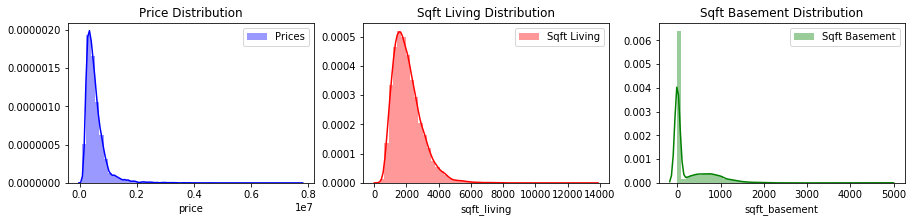

In [32]:
plt.figure(figsize=(15,10))
plt.subplot(331)
sns.distplot(targ_var, label='Prices',color='blue')
plt.title('Price Distribution')
plt.legend()
plt.subplot(332)
sns.distplot(df_num.sqft_living, label='Sqft Living',color='red')
plt.title('Sqft Living Distribution')
plt.legend()
plt.subplot(333)
sns.distplot(df_num.sqft_basement, label='Sqft Basement', color='green')
plt.legend()
plt.title('Sqft Basement Distribution')


Text(0.5, 1.0, 'Sqft Lot15 Distribution')

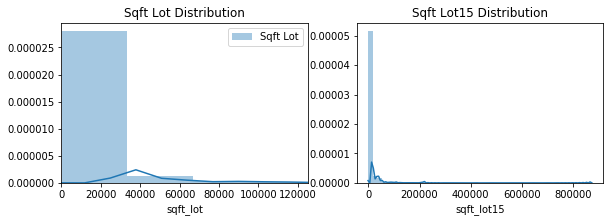

In [33]:
plt.figure(figsize=(15,10))
plt.subplot(334)
sns.distplot(df_num.sqft_lot, label='Sqft Lot')
plt.title('Sqft Lot Distribution')
plt.xlim(0,125000)
plt.legend()
plt.subplot(335)
sns.distplot(df_num.sqft_lot15, label='Sqft Lot15')
plt.title('Sqft Lot15 Distribution')




Sqft Lot and Sqft Lot15 desperately need a log transformation.  We also are going to log transform sqft living to rid these variables of skewness. Lastly, sqft_basement will get a sqaure root transformation to help normalize data, due to having values of 0, a log transform will not work here. 

In [34]:
# price = np.log(df_num.price)
df_num_final.sqft_living = np.log(df_num_final.sqft_living)
df_num_final.sqft_lot = np.log(df_num_final.sqft_lot)
# df_num_final.sqft_lot15= np.log(df_num_final.sqft_lot15)
# df_num_final.sqft_basement=np.sqrt(df_num_final.sqft_basement)
# plt.figure(figsize=(10,4))

# sns.distplot(sqft_living, label='Sqft Living')
# sns.distplot(sqft_lot, label='Sqft Lot')
# sns.distplot(sqft_lot15, label='Sqft Lot15')
# plt.legend()
df_num_final.head()

,sqft_living,sqft_lot,sqft_basement,sqft_lot15
0,7.073270,8.639411,0.0,5650
1,7.851661,8.887653,400.0,7639
2,6.646391,9.210340,0.0,8062
3,7.580700,8.517193,910.0,5000
4,7.426549,8.997147,0.0,7503


In [35]:
# targ_var = ( price - min(price) ) / ( max(price) - min(price) )
df_num_final['sqft_living'] = ( df_num_final.sqft_living - min(df_num_final.sqft_living) ) / ( max(df_num_final.sqft_living) - min(df_num_final.sqft_living) )
df_num_final['sqft_lot'] = ( df_num_final.sqft_lot - min(df_num_final.sqft_lot) ) / ( max(df_num_final.sqft_lot) - min(df_num_final.sqft_lot) )
# df_num_final['sqft_basement'] = ( df_num_final.sqft_basement - min(df_num_final.sqft_basement)) / ( max(df_num_final.sqft_basement) - min(df_num_final.sqft_basement))
# df_num_final['sqft_lot15'] = ( df_num_final.sqft_lot15 - min(df_num_final.sqft_lot15)) / ( max(df_num_final.sqft_lot15) - min(df_num_final.sqft_lot15))

Joining our categorical and numerical together into one final DataFrame.

In [36]:
df_final= df_cat_final.join(df_num_final,how='inner')
df_final.describe()

,waterfront_0.0,waterfront_1.0,condition_1,condition_2,condition_3,condition_4,condition_5,view_0.0,view_1.0,view_2.0,...,yr_built_new_1970-1980,yr_built_new_1980-1990,yr_built_new_1990-2000,yr_built_new_2000-2015,yr_renovated_0,yr_renovated_1,sqft_living,sqft_lot,sqft_basement,sqft_lot15
count,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,0.993240,0.006760,0.001343,0.007871,0.649164,0.262861,0.078761,0.902209,0.015280,0.044312,...,0.110802,0.109182,0.098764,0.210122,0.965551,0.034449,0.454795,0.339313,285.716581,12758.283512
std,0.081944,0.081944,0.036620,0.088373,0.477243,0.440198,0.269372,0.297039,0.122667,0.205792,...,0.313895,0.311874,0.298351,0.407404,0.182384,0.182384,0.117834,0.111875,439.819830,27274.441950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,651.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.375546,0.281688,0.000000,5100.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.455945,0.332922,0.000000,7620.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.536222,0.374881,550.000000,10083.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4820.000000,871200.000000


### Multicollinearity

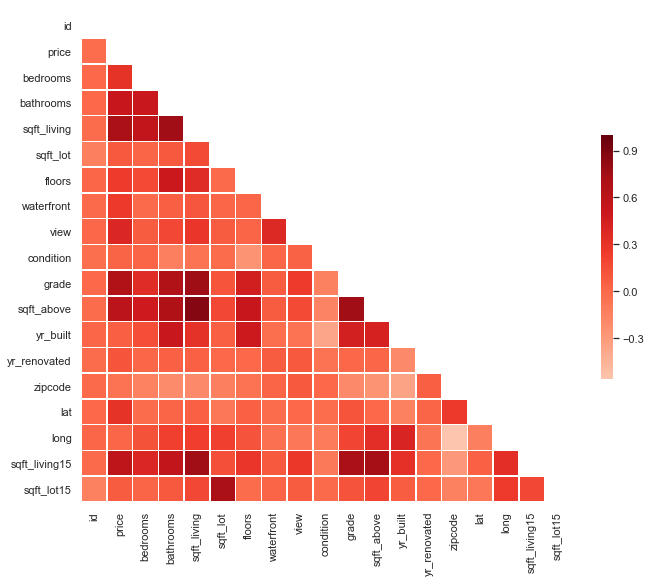

In [37]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=plt.cm.Reds,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

We are going to drop sqft_living15 and sqft_above due to multicollinearity. In addition, through research and best practices, I believe zipcode will do just fine for location based statistics.  Therefore we are going to drop latitude and longitude. 

In [38]:
# df_final=df_final.drop(['sqft_living15','sqft_above','lat','long'],axis=1)

## EDA

The following questions will be answered below with a meaningful explanation for each:

    1. What zipcode has the most expensive houses? Also which area is the cheapest?
    2. What day of the week do most houses sell?
    3. What year sold the most houses? Also, zero in on the 2009 financial crisis and look at that.
    4. What sort of affect does a waterfront view have on the price of the house?

#### Question 1: What zipcode has the most expensive houses? Which has the cheapest?

In [39]:
df.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [40]:
df_zipcode= df.groupby('zipcode')['price'].mean()

In [41]:
zip_max=df_zipcode.sort_values(ascending=False)
zip_max.astype('int64')

zipcode
98039    2161300
98004    1356523
98040    1194873
98112    1096239
98102     899607
98109     880077
98105     863228
98006     859938
98119     849714
98005     810289
98033     803990
98199     792187
98075     790734
98074     685675
98077     682885
98053     677215
98177     676419
98008     645628
98052     645244
98122     634558
98115     619944
98116     618695
98007     617254
98027     617053
98029     612642
98144     594706
98024     586120
98103     585048
98107     579109
98117     576834
          ...   
98014     455617
98045     440232
98019     424815
98126     424734
98155     423736
98010     423665
98056     420895
98118     418019
98133     387011
98038     367091
98146     359496
98108     355678
98058     353619
98092     334921
98106     319581
98022     316742
98042     311580
98178     310612
98055     304262
98198     302896
98031     300340
98030     296187
98003     294111
98188     289078
98023     286742
98148     284908
98001     281194
98032 

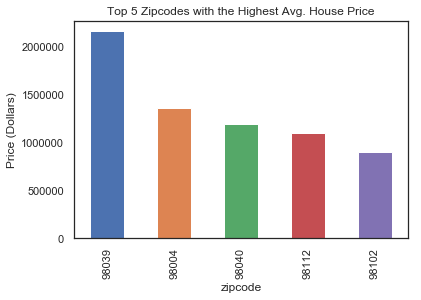

In [42]:
zip_max[0:5].plot.bar(x=['zipcode'],y=['price'])
plt.title('Top 5 Zipcodes with the Highest Avg. House Price')
plt.ylabel('Price (Dollars)')
plt.savefig("TopFive.png")

In [43]:
zip_max.astype('int64')

zipcode
98039    2161300
98004    1356523
98040    1194873
98112    1096239
98102     899607
98109     880077
98105     863228
98006     859938
98119     849714
98005     810289
98033     803990
98199     792187
98075     790734
98074     685675
98077     682885
98053     677215
98177     676419
98008     645628
98052     645244
98122     634558
98115     619944
98116     618695
98007     617254
98027     617053
98029     612642
98144     594706
98024     586120
98103     585048
98107     579109
98117     576834
          ...   
98014     455617
98045     440232
98019     424815
98126     424734
98155     423736
98010     423665
98056     420895
98118     418019
98133     387011
98038     367091
98146     359496
98108     355678
98058     353619
98092     334921
98106     319581
98022     316742
98042     311580
98178     310612
98055     304262
98198     302896
98031     300340
98030     296187
98003     294111
98188     289078
98023     286742
98148     284908
98001     281194
98032 

Text(0, 0.5, 'Price (Dollars)')

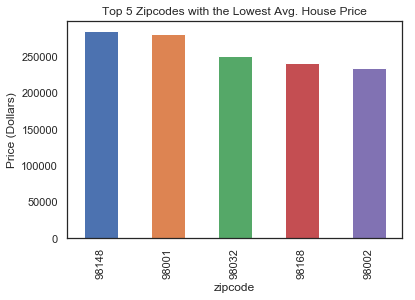

In [44]:
zip_max[-5:].plot.bar(x=['zipcode'],y=['price'])
plt.title('Top 5 Zipcodes with the Lowest Avg. House Price')
plt.ylabel('Price (Dollars)')

#### Question 2: What day do most houses sell on?

In [45]:
date=pd.to_datetime(df.date)

In [46]:
day_of_week= date.dt.day_name()

In [47]:
graph_day=day_of_week.groupby(day_of_week).count()

In [48]:
dict_day=graph_day
dict_day

date
Friday       3684
Monday       4097
Saturday      287
Sunday        230
Thursday     3989
Tuesday      4710
Wednesday    4600
Name: date, dtype: int64

In [49]:
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
count=[4097,4710,4600,3989,3684,287,230]

Text(0, 0.5, 'Day of Week')

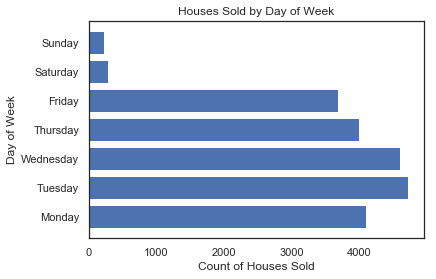

In [50]:
fig, ax = plt.subplots()
plt.barh(days,count)
plt.title('Houses Sold by Day of Week')
plt.xlabel('Count of Houses Sold')
plt.ylabel('Day of Week')

We see here the weekend (Saturday and Sunday) are least likely have a house sold. With Tuesday (4710) and Wednesday (4600) coming in first and second respectively.

#### 3. What year sold the most houses? Also, zero in on the 2009 financial crisis and look at that.
   

In [51]:
year= pd.to_datetime(df.date)
year_sold=year.dt.year
graph_year=year_sold.groupby(year_sold).count()
graph_year

df.date.unique()

array(['10/13/2014', '12/9/2014', '2/25/2015', '2/18/2015', '5/12/2014',
       '6/27/2014', '1/15/2015', '4/15/2015', '3/12/2015', '4/3/2015',
       '5/27/2014', '5/28/2014', '10/7/2014', '1/24/2015', '7/31/2014',
       '5/29/2014', '12/5/2014', '4/24/2015', '5/14/2014', '8/26/2014',
       '7/3/2014', '5/16/2014', '11/20/2014', '11/3/2014', '6/26/2014',
       '12/1/2014', '6/24/2014', '3/2/2015', '11/10/2014', '12/3/2014',
       '6/13/2014', '12/30/2014', '2/13/2015', '6/20/2014', '7/15/2014',
       '8/11/2014', '7/7/2014', '10/28/2014', '7/29/2014', '7/18/2014',
       '3/25/2015', '7/16/2014', '4/28/2015', '3/11/2015', '9/16/2014',
       '2/17/2015', '12/31/2014', '2/5/2015', '3/3/2015', '8/19/2014',
       '4/7/2015', '8/27/2014', '2/23/2015', '12/10/2014', '8/28/2014',
       '10/21/2014', '12/7/2014', '6/3/2014', '9/9/2014', '10/9/2014',
       '8/25/2014', '6/12/2014', '9/12/2014', '1/5/2015', '6/10/2014',
       '7/10/2014', '3/16/2015', '11/5/2014', '4/20/2015', '6/9/20

It appears the data only has dates 2014 and 2015 where houses were sold. Thus our question can not be answered.

3.a. Alternative question: 

####  4. What sort of affect does a waterfront view have on the price of the house?

Text(0, 0.5, 'Price')

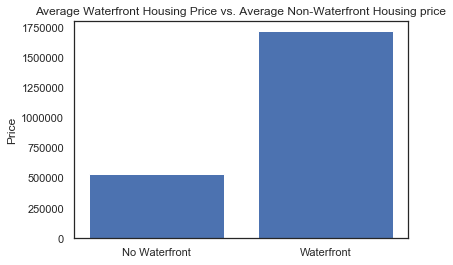

In [52]:
df_price_waterfront = df[['waterfront','price']]

plt.bar(['No Waterfront','Waterfront'],df_price_waterfront.groupby('waterfront')['price'].mean())
plt.title('Average Waterfront Housing Price vs. Average Non-Waterfront Housing price')
plt.ylabel('Price')

In [53]:
statistic_waterfront=df_price_waterfront.groupby('waterfront')['price'].mean()
print('On average, having a waterfront property increases property value by ', round((statistic_waterfront[1]-statistic_waterfront[0])/(statistic_waterfront[0])*100,2),'%')

On average, having a waterfront property increases property value by  222.61 %


In [54]:
###Double check the percentage change

### More Data Exploration

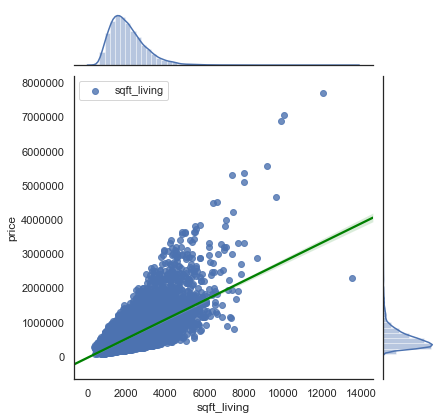

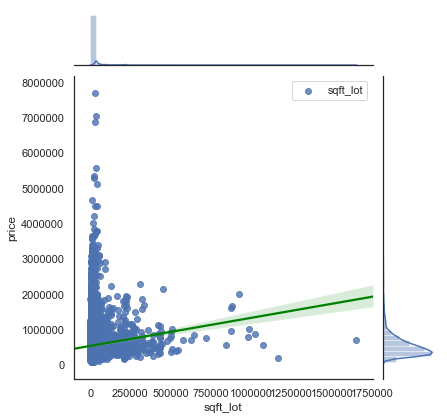

TypeError: unsupported operand type(s) for /: 'str' and 'float'

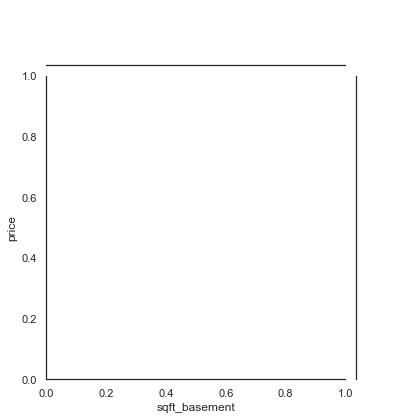

In [55]:
for column in df_num_final:
    sns.jointplot(x=column, y="price",
                  data=df, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})
#     sns.regplot(walmart[column], walmart.Weekly_Sales, label=column)
    plt.legend()
    plt.show()

In [56]:
# df_w_dummies=pd.get_dummies(df_new)
# df_w_dummies.describe()

# Modeling Data

We will be using a simple statsmodels method of LinearRegression() to get the line of best fit for our data. We also will be using sklearn LinearRegression() method to double check our analysis and to provide further details. When we do this we hope to get a value of .75 or above.  Technically, we would like something close to .9 which would show a strong correlation between our data and price. 

In [57]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
X = df_final.drop('date',axis=1)
y = targ_var

#### Sklearn Linear Regression

In [58]:
linreg = LinearRegression()
linreg.fit(X, y)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
linreg.score(X,y)

0.8350841918024127

#### Stats Models Linear Regression

In [60]:
X = df_final.drop('date',axis=1)
y = targ_var

In [61]:
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     733.8
Date:                Thu, 04 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:28:50   Log-Likelihood:            -2.8793e+05
No. Observations:               21597   AIC:                         5.762e+05
Df Residuals:                   21448   BIC:                         5.773e+05
Df Model:                         148                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4.056e+05    1.3e+04     31.164      0.000     3.8e+05    4.31e+05
waterfront_0.0         -9.631e+04   9170.908    -10.501      0.000   -1.14e+05   -7.83e+04
waterfront_1.0          5.019e+05    1.1e+04     45.575      0.000     4.8e+05    5.23e+05
condition_1             -2.82e+04   2.31e+04     -1.220      0.223   -7.35e+04    1.71e+04
condition_2             7.308e+04   1.11e+04      6.591      0.000    5.13e+04    9.48e+04
condition_3             8.632e+04   6485.630     13.309      0.000    7.36e+04     9.9e+04
condition_4             1.126e+05   6539.905     17.210      0.000    9.97e+04    1.25e+05
condition_5             1.618e+05   6984.377     23.166      0.000    1.48e+05    1.75e+05
view_0.0                -4.49e+04   4423.333    -10.150      0.000   -5.36e+04   -3.62e+04
view_1.0                5.183e+04   7814.067      6.633      0.000    3.65e+04    6.71e+04
view_2.0                3.137e+04   5621.994      5.580      0.000    2.04e+04    4.24e+04
view_3.0                1.146e+05   6668.176     17.191      0.000    1.02e+05    1.28e+05
view_4.0                2.526e+05   8825.850     28.622      0.000    2.35e+05     2.7e+05
floors_1.0              5.073e+04   9952.834      5.097      0.000    3.12e+04    7.02e+04
floors_1.5              4.019e+04   1.02e+04      3.936      0.000    2.02e+04    6.02e+04
floors_2.0              4.617e+04   9685.640      4.767      0.000    2.72e+04    6.52e+04
floors_2.5              1.357e+05   1.38e+04      9.817      0.000    1.09e+05    1.63e+05
floors_3.0              2699.3203    1.1e+04      0.245      0.807   -1.89e+04    2.43e+04
floors_3.5              1.301e+05   4.83e+04      2.695      0.007    3.55e+04    2.25e+05
grade_3                -1.155e+05   1.38e+05     -0.835      0.404   -3.87e+05    1.56e+05
grade_4                -2.524e+05   3.11e+04     -8.126      0.000   -3.13e+05   -1.91e+05
grade_5                 -3.25e+05   1.73e+04    -18.804      0.000   -3.59e+05   -2.91e+05
grade_6                -3.335e+05   1.51e+04    -22.041      0.000   -3.63e+05   -3.04e+05
grade_7                -3.233e+05   1.48e+04    -21.817      0.000   -3.52e+05   -2.94e+05
grade_8                 -2.84e+05   1.48e+04    -19.129      0.000   -3.13e+05   -2.55e+05
grade_9                -1.847e+05   1.51e+04    -12.266      0.000   -2.14e+05   -1.55e+05
grade_10               -3.843e+04   1.55e+04     -2.483      0.013   -6.88e+04   -8092.977
grade_11                1.912e+05   1.66e+04     11.501      0.000    1.59e+05    2.24e+05
grade_12                6.122e+05   2.16e+04     28.386      0.000     5.7e+05    6.54e+05
grade_13                1.459e+06   4.53e+04     32.180      0.000    1.37e+06    1.55e+06
bedrooms_1              1.086e+05   2.27e+04      4.788      0.000    6.41e+04  

We see here that we get roughly a .83 r-sqaured value. This is great, but I have a feeling we can make it better. I noticed that our standard error is fairly large for most variables. I have a feeling this has to do with the fact I logged transformed some variables earlier in the analysis to get rid of skewness. Thus I am going to log transform our target variable price due to the above stated observation and because price is skewed to the left as you can see below. 

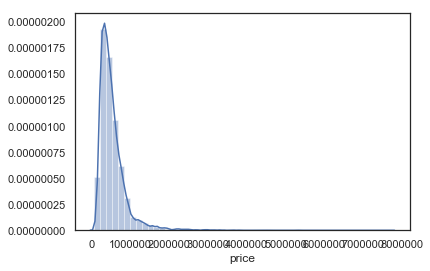

In [62]:
sns.distplot(df.price)

In [63]:
targ_var_log=np.log(targ_var)

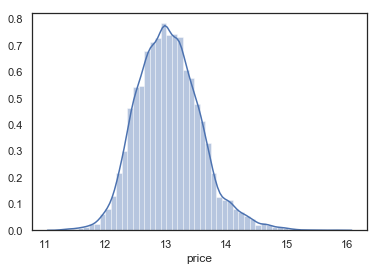

In [64]:
sns.distplot(targ_var_log)

Much better, now let us redo both of our linear regressions. 

Lets also add in train test split functionality which also should boost our r-squared.

In [65]:
X = df_final.drop('date',axis=1)
y = targ_var_log #adding in the log of targ var

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #adding in the train/test split

linreg = LinearRegression()
linreg.fit(X, y)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
linreg.score(X,y)

0.88580554050427

In [67]:
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1124.
Date:                Thu, 04 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:29:00   Log-Likelihood:                 6639.1
No. Observations:               21597   AIC:                        -1.298e+04
Df Residuals:                   21448   BIC:                        -1.179e+04
Df Model:                         148                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4.5165      0.016    290.981      0.000       4.486       4.547
waterfront_0.0             2.0472      0.011    187.162      0.000       2.026       2.069
waterfront_1.0             2.4692      0.013    188.009      0.000       2.443       2.495
condition_1                0.6741      0.028     24.446      0.000       0.620       0.728
condition_2                0.8242      0.013     62.330      0.000       0.798       0.850
condition_3                0.9545      0.008    123.396      0.000       0.939       0.970
condition_4                1.0015      0.008    128.394      0.000       0.986       1.017
condition_5                1.0621      0.008    127.503      0.000       1.046       1.078
view_0.0                   0.7438      0.005    140.984      0.000       0.733       0.754
view_1.0                   0.8810      0.009     94.529      0.000       0.863       0.899
view_2.0                   0.8662      0.007    129.173      0.000       0.853       0.879
view_3.0                   0.9468      0.008    119.046      0.000       0.931       0.962
view_4.0                   1.0787      0.011    102.474      0.000       1.058       1.099
floors_1.0                 0.7945      0.012     66.931      0.000       0.771       0.818
floors_1.5                 0.7739      0.012     63.546      0.000       0.750       0.798
floors_2.0                 0.7606      0.012     65.841      0.000       0.738       0.783
floors_2.5                 0.7745      0.016     46.988      0.000       0.742       0.807
floors_3.0                 0.6885      0.013     52.310      0.000       0.663       0.714
floors_3.5                 0.7244      0.058     12.582      0.000       0.612       0.837
grade_3                    0.5605      0.165      3.398      0.001       0.237       0.884
grade_4                    0.0376      0.037      1.014      0.310      -0.035       0.110
grade_5                    0.0171      0.021      0.830      0.406      -0.023       0.058
grade_6                    0.1007      0.018      5.581      0.000       0.065       0.136
grade_7                    0.1976      0.018     11.179      0.000       0.163       0.232
grade_8                    0.2953      0.018     16.672      0.000       0.261       0.330
grade_9                    0.4136      0.018     23.030      0.000       0.378       0.449
grade_10                   0.5058      0.018     27.397      0.000       0.470       0.542
grade_11                   0.6188      0.020     31.206      0.000       0.580       0.658
grade_12                   0.7479      0.026     29.073      0.000       0.697       0.798
grade_13                   1.0218      0.054     18.896      0.000       0.916       1.128
bedrooms_1                 0.4447      0.027     16.439      0.000       0.392  

Perfect, now we will take this one step further by validating our model and also then using a sklearn function do feature selection. At the end of the day we want the best features to make our model the most accurate. 

Now we would like to look at our Mean Squared Error, this will help us identify the validaty of our model.

In [47]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [48]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.031486512563879965
Test Mean Squarred Error: 0.27340172152952047


##### Cross Validation


In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [50]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-14.263189799351924
-3.585832142524332
-1.610713516537929


In [95]:
cross_validation(X, y, cv=15, show_scores=False)
score = cross_val_score(linreg, X, y, cv=15, scoring="r2")


Model Accuracy: 88.0 %
